# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [2]:
# WRITE YOUR CODE HERE
set.seed(2)
n_size <- 100
sd_x <- 25
sd_e <- 50
b0 <- 5
b1_x <- 5
b2_x2 <- 10
b3_x3 <- 15
gen_x <- rnorm(n_size,0,sd_x)
gen_eps <- rnorm(n_size,0,sd_e)

gen_y <- b0 + b1_x*gen_x + b2_x2*gen_x^2 + b3_x3*gen_x^3 + gen_eps

d1 <- data.frame(y=gen_y, x1=gen_x, x2=gen_x^2, x3=gen_x^3, x4=gen_x^4, x5=gen_x^5, x6=gen_x^6, x7=gen_x^7, x8=gen_x^8, x9=gen_x^9, x10=gen_x^10)
head(d1)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-164133.6736,-22.422864,502.784815,-11273.875359,2.527926e+05,-5.668333e+06,1.271003e+08,-2.849952e+09,6.390408e+10,-1.432913e+12,3.213000e+13
2,1735.0419,4.621230,21.355763,98.689885,4.560686e+02,2.107598e+03,9.739693e+03,4.500936e+04,2.079986e+05,9.612092e+05,4.441969e+06
3,954232.9753,39.696133,1575.782997,62552.491886,2.483092e+06,9.856915e+07,3.912814e+09,1.553236e+11,6.165746e+12,2.447563e+14,9.715878e+15
4,-330704.2307,-28.259392,798.593228,-22567.758966,6.377511e+05,-1.802246e+07,5.093037e+08,-1.439261e+10,4.067265e+11,-1.149384e+13,3.248090e+14
5,-129.0257,-2.006294,4.025215,-8.075765,1.620236e+01,-3.250669e+01,6.521798e+01,-1.308464e+02,2.625164e+02,-5.266851e+02,1.056685e+03
6,777.7695,3.310507,10.959457,36.281361,1.201097e+02,3.976240e+02,1.316337e+03,4.357744e+03,1.442634e+04,4.775851e+04,1.581049e+05


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [4]:
# WRITE YOUR CODE HERE
library(tidyverse)
#install.packages("leaps")
library(leaps)

regfit.full = regsubsets(y~., d1, nvmax=10)
reg.summary = summary(regfit.full)
reg.summary

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Subset selection object
Call: regsubsets.formula(y ~ ., d1, nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " "*" " " " " " " " " " "
5  ( 1 )  "*" "*" "*" " " "*" " " " " " " "*" " "
6  ( 1 )  "*" "*" "*" " " "*" " " " " " " "*" "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" "*" " " "*" " "
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*"
9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# Subset selection object
# Call: regsubsets.formula(y ~ ., d1, nvmax = 10)
# 10 Variables  (and intercept)
#     Forced in Forced out
# x1      FALSE      FALSE
# x2      FALSE      FALSE
# x3      FALSE      FALSE
# x4      FALSE      FALSE
# x5      FALSE      FALSE
# x6      FALSE      FALSE
# x7      FALSE      FALSE
# x8      FALSE      FALSE
# x9      FALSE      FALSE
# x10     FALSE      FALSE
# 1 subsets of each size up to 10
# Selection Algorithm: exhaustive
#           x1  x2  x3  x4  x5  x6  x7  x8  x9  x10
# 1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
# 2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
# 3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
# 4  ( 1 )  "*" "*" "*" " " "*" " " " " " " " " " "
# 5  ( 1 )  "*" "*" "*" " " "*" " " " " " " "*" " "
# 6  ( 1 )  "*" "*" "*" " " "*" " " " " " " "*" "*"
# 7  ( 1 )  "*" "*" "*" "*" " " "*" "*" " " "*" " "
# 8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" " " "*"
# 9  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" "*"
# 10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" "*"

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

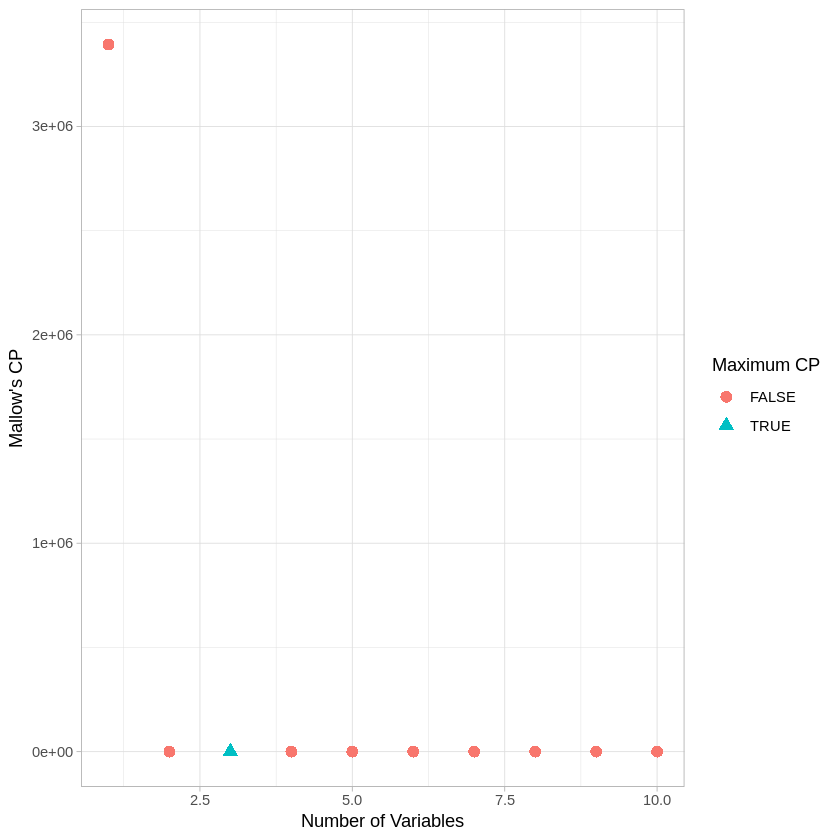

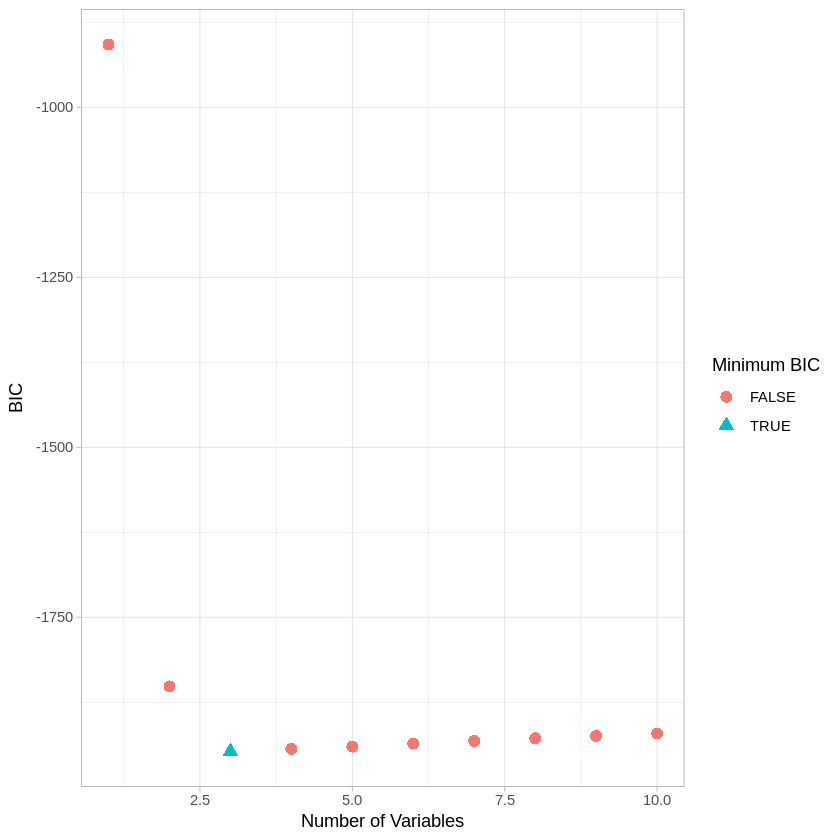

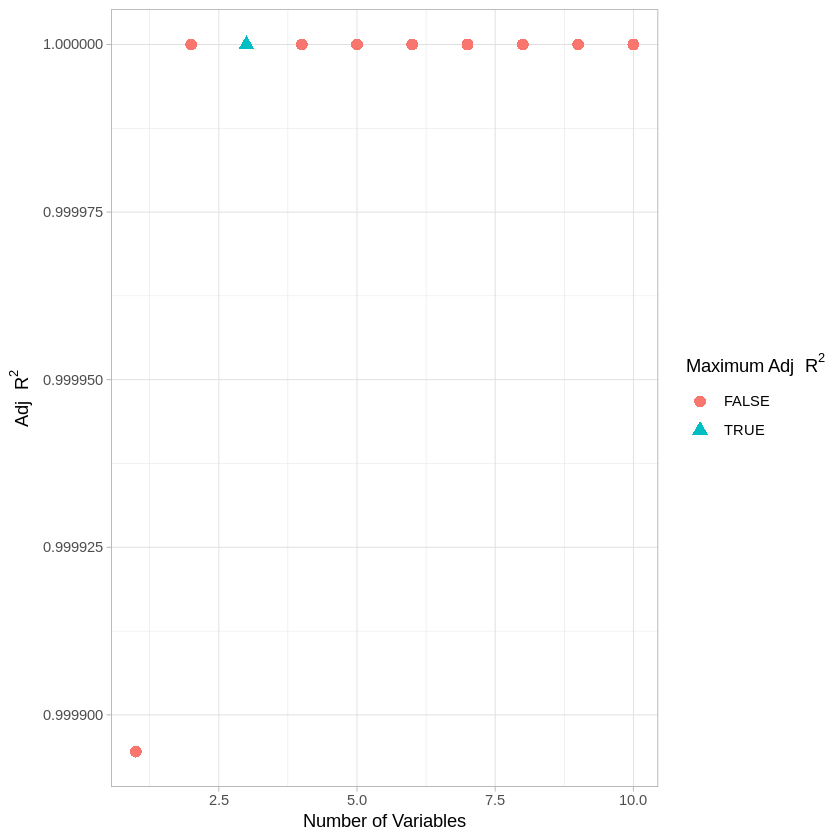

Model with best Mallows' CP: 3 
Model with best BIC: 3 
Model with best Adj R^2: 3 


(Intercept)          x1          x2          x3 
   3.107643    4.973459   10.004035   14.999960

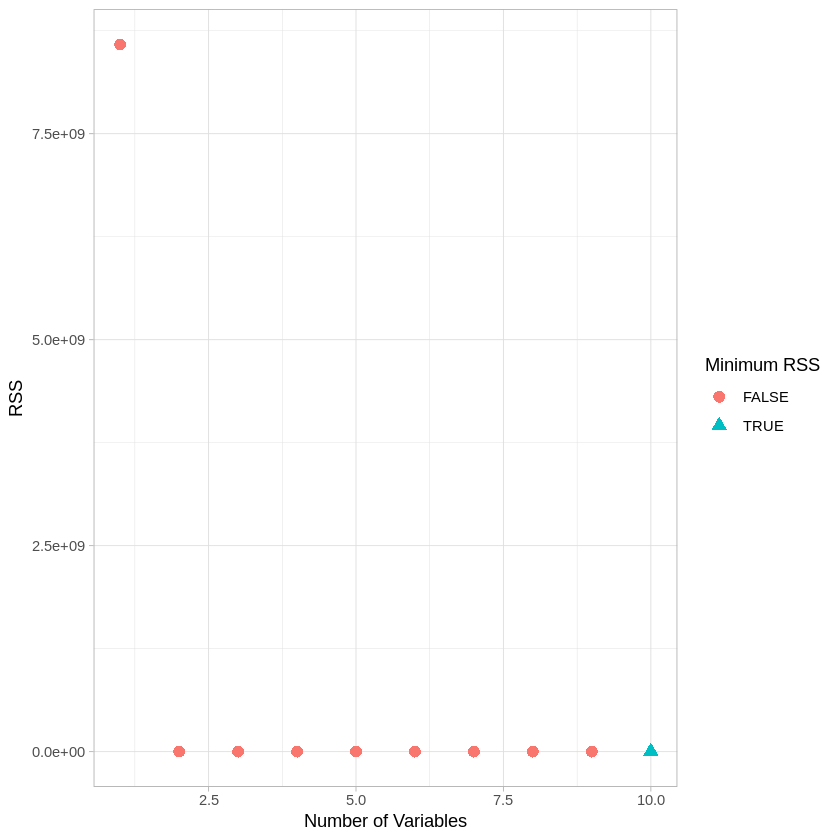

In [6]:
# WRITE YOUR CODE HERE
numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19.
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.


#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

#rss
rss.df <- data.frame(numvar = numvar, rss = reg.summary$rss, minrss = allfalse)
rss.df$minrss[which.min(reg.summary$rss)] <- TRUE
ggplot(rss.df,aes(x=numvar,y=rss,shape=minrss,col=minrss)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "RSS", color="Minimum RSS", shape="Minimum RSS")


cat("Model with best Mallows' CP:", which.min(reg.summary$cp), "\n")
cat("Model with best BIC:", which.min(reg.summary$bic), "\n")
cat("Model with best Adj R^2:", which.max(reg.summary$adjr2), "\n")

#          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10
#3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
coef(regfit.full, 3)

> *Write your response here*
>

The Model with the best Mallows' CP, Adj R^2, and BIC includes 3 predictors: x1, x2, x3.

(Intercept): 3.10764304440525

x1: 4.97345928257779

x2: 10.0040353435998

x3: 14.9999600366593

I also notice that these beta coefficient estimates are very close to the parameters in the linear combination of x1, x2, and x3 used to generate y.


---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

In [7]:
# WRITE YOUR CODE HERE

reg.null <- lm(y ~ 1, d1)
reg.full <- lm(y ~ ., d1)

cat("Forwards stepwise selection model \n")
forward_model <- step(reg.null, direction = "forward", scope= formula(lm(y ~ ., d1) ))
summary(forward_model)



Forwards stepwise selection model 
Start:  AIC=2745.49
y ~ 1

       Df  Sum of Sq        RSS    AIC
+ x3    1 8.2185e+13 8.5823e+09 1830.8
+ x5    1 7.6505e+13 5.6885e+12 2480.4
+ x7    1 6.5827e+13 1.6367e+13 2586.1
+ x1    1 6.5169e+13 1.7025e+13 2590.1
+ x9    1 5.4552e+13 2.7642e+13 2638.5
+ x10   1 1.2826e+13 6.9368e+13 2730.5
+ x8    1 9.1812e+12 7.3013e+13 2735.7
+ x6    1 5.0024e+12 7.7191e+13 2741.2
<none>               8.2194e+13 2745.5
+ x4    1 1.5860e+12 8.0608e+13 2745.5
+ x2    1 9.6445e+10 8.2097e+13 2747.4

Step:  AIC=1830.78
y ~ x3

       Df  Sum of Sq        RSS     AIC
+ x2    1 8581687761     650485  884.03
+ x4    1 7847907036  734431209 1586.94
+ x6    1 6711978718 1870359528 1680.42
+ x8    1 5580661082 3001677164 1727.73
+ x10   1 4575164819 4007173427 1756.62
+ x9    1 1730342109 6851996136 1810.26
+ x7    1 1559355508 7022982737 1812.73
+ x5    1 1247076114 7335262131 1817.08
+ x1    1  373311349 8209026896 1828.33
<none>               8582338246 1830.78

S


Call:
lm(formula = y ~ x3 + x2 + x1, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.035  -39.108    3.056   38.273  106.128 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 3.108e+00  6.837e+00     0.455     0.65    
x3          1.500e+01  1.839e-04 81560.248   <2e-16 ***
x2          1.000e+01  5.496e-03  1820.093   <2e-16 ***
x1          4.973e+00  3.854e-01    12.904   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.78 on 96 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.106e+10 on 3 and 96 DF,  p-value: < 2.2e-16


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here
# Forwards selection model
# Call:
# lm(formula = y ~ x3 + x2 + x1, data = d1)

# Residuals:
#      Min       1Q   Median       3Q      Max
# -104.035  -39.108    3.056   38.273  106.128

# Coefficients:
#              Estimate Std. Error   t value Pr(>|t|)
# (Intercept) 3.108e+00  6.837e+00     0.455     0.65
# x3          1.500e+01  1.839e-04 81560.248   <2e-16 ***
# x2          1.000e+01  5.496e-03  1820.093   <2e-16 ***
# x1          4.973e+00  3.854e-01    12.904   <2e-16 ***
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Residual standard error: 49.78 on 96 degrees of freedom
# Multiple R-squared:      1,	Adjusted R-squared:      1
# F-statistic: 1.106e+10 on 3 and 96 DF,  p-value: < 2.2e-16
```

b) Backwards stepwise selection:

In [8]:
# WRITE YOUR CODE HERE
cat("\n \n Backwards stepwise selection model \n")
backward_model <- step(reg.full, direction = "backward")
summary(backward_model)



 
 Backwards stepwise selection model 
Start:  AIC=793.91
y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10

       Df  Sum of Sq        RSS     AIC
- x5    1 2.4630e+03 2.2756e+05  793.00
- x7    1 3.5490e+03 2.2864e+05  793.47
- x9    1 4.0850e+03 2.2918e+05  793.71
<none>               2.2509e+05  793.91
- x10   1 6.1830e+03 2.3128e+05  794.62
- x4    1 6.2470e+03 2.3134e+05  794.65
- x6    1 6.3640e+03 2.3146e+05  794.70
- x8    1 6.3680e+03 2.3146e+05  794.70
- x1    1 3.4653e+04 2.5975e+05  806.23
- x2    1 2.4184e+07 2.4409e+07 1260.53
- x3    1 1.9386e+10 1.9386e+10 1928.26

Step:  AIC=793
y ~ x1 + x2 + x3 + x4 + x6 + x7 + x8 + x9 + x10

       Df  Sum of Sq        RSS     AIC
- x9    1 3.0370e+03 2.3060e+05  792.32
- x7    1 3.7210e+03 2.3128e+05  792.62
- x10   1 3.8600e+03 2.3142e+05  792.68
- x8    1 3.9120e+03 2.3147e+05  792.70
- x6    1 3.9720e+03 2.3153e+05  792.73
- x4    1 4.1690e+03 2.3173e+05  792.81
<none>               2.2756e+05  793.00
- x1    1 6.0068e+04 2


Call:
lm(formula = y ~ x1 + x2 + x3, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-104.035  -39.108    3.056   38.273  106.128 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 3.108e+00  6.837e+00     0.455     0.65    
x1          4.973e+00  3.854e-01    12.904   <2e-16 ***
x2          1.000e+01  5.496e-03  1820.093   <2e-16 ***
x3          1.500e+01  1.839e-04 81560.248   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.78 on 96 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.106e+10 on 3 and 96 DF,  p-value: < 2.2e-16


In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here
# Backwards selection model
# Call:
# lm(formula = y ~ x1 + x2 + x3, data = d1)

# Residuals:
#      Min       1Q   Median       3Q      Max
# -104.035  -39.108    3.056   38.273  106.128

# Coefficients:
#              Estimate Std. Error   t value Pr(>|t|)
# (Intercept) 3.108e+00  6.837e+00     0.455     0.65
# x1          4.973e+00  3.854e-01    12.904   <2e-16 ***
# x2          1.000e+01  5.496e-03  1820.093   <2e-16 ***
# x3          1.500e+01  1.839e-04 81560.248   <2e-16 ***
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Residual standard error: 49.78 on 96 degrees of freedom
# Multiple R-squared:      1,	Adjusted R-squared:      1
# F-statistic: 1.106e+10 on 3 and 96 DF,  p-value: < 2.2e-16
```

c) Compare your results from parts a and b with those of question 1.

> *Write your response here*
> The results are the same as those from question 1, they get the same 3 (x, x^2, x^3) as the main predictors. The parameter estimates are the same (because it's the same model).

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [11]:
# WRITE YOUR CODE HERE
set.seed(3)

p_size <- 20
count_beta_is_0s <- 12
n_size <- 1000
frame_X <- matrix(rnorm(n_size * p_size, sd_x), n_size, p_size)
gen_eps <- rnorm(n_size,0,sd_e)
beta_20 <- matrix(c(rnorm(p_size-count_beta_is_0s,mean = 10, sd = 5),rep(0, count_beta_is_0s)),p_size, 1)
gen_y <- frame_X %*% beta_20 + gen_eps

d2 <- as.data.frame(cbind(gen_y, frame_X))
colnames(d2) <- c("y","x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20")
head(d2)

test<-sample(1:n_size, 900)

d2_test<-d2[test,]
dim(d2_test)
d2_train<-d2[-test,]
dim(d2_train)


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,⋯,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1659.259,24.03807,25.44180,24.02499,26.41750,25.81881,25.31629,24.97503,24.93603,25.03150,⋯,24.27727,24.71805,26.33752,25.70198,26.00762,24.53462,25.63860,25.28678,24.77292,24.77995
2,1783.214,24.70747,23.86073,25.19584,23.71888,24.74856,27.51200,24.07779,25.05954,23.59035,⋯,24.88423,25.82598,25.34645,24.43045,24.86846,25.69023,24.09096,26.30264,23.32731,24.47450
3,1703.339,25.25879,24.02716,25.58849,24.19974,23.17960,22.94108,24.93524,26.59212,24.82688,⋯,24.81242,23.49984,23.77126,25.85599,26.24986,24.10192,25.87021,24.77475,25.45029,25.55144
4,1746.339,23.84787,22.78683,24.13848,25.63093,25.95177,23.83428,24.60844,26.06362,24.64999,⋯,24.75678,24.56697,24.96121,24.94210,23.60224,24.84381,22.26402,25.77562,25.61416,27.01919
5,1702.236,25.19578,25.59331,25.28299,25.24715,26.97867,24.12898,24.01028,23.96775,23.89035,⋯,26.65096,23.25509,24.62111,24.32017,22.86842,24.76983,25.46612,23.19955,25.62629,24.90228
6,1717.660,25.03012,24.30899,24.59657,24.27014,24.63590,26.12535,23.59596,24.19387,23.76208,⋯,24.72794,27.17656,26.43641,23.97422,25.29816,24.44403,25.20465,23.80835,25.23509,25.67096


[1] 900  21

[1] 100  21

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(y ~ ., d2_train, nvmax = 20)
20 Variables  (and intercept)
    Forced in Forced out
x1      FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
x11     FALSE      FALSE
x12     FALSE      FALSE
x13     FALSE      FALSE
x14     FALSE      FALSE
x15     FALSE      FALSE
x16     FALSE      FALSE
x17     FALSE      FALSE
x18     FALSE      FALSE
x19     FALSE      FALSE
x20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x1  x2  x3  x4  x5  x6  x7  x8  x9  x10 x11 x12 x13 x14 x15 x16 x17
1  ( 1 )  " " " " " " " " " " " " " " "*" " " " " " " " " " " " " " " " " " "
2  ( 1 )  " " " " "*" " " " " " " " " " " " " " " "*" " " " " " " " " " " " "
3  ( 1 )  " " " " "*" " " " " " " " " "*" " " " " "*" " " " " " " " "

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21


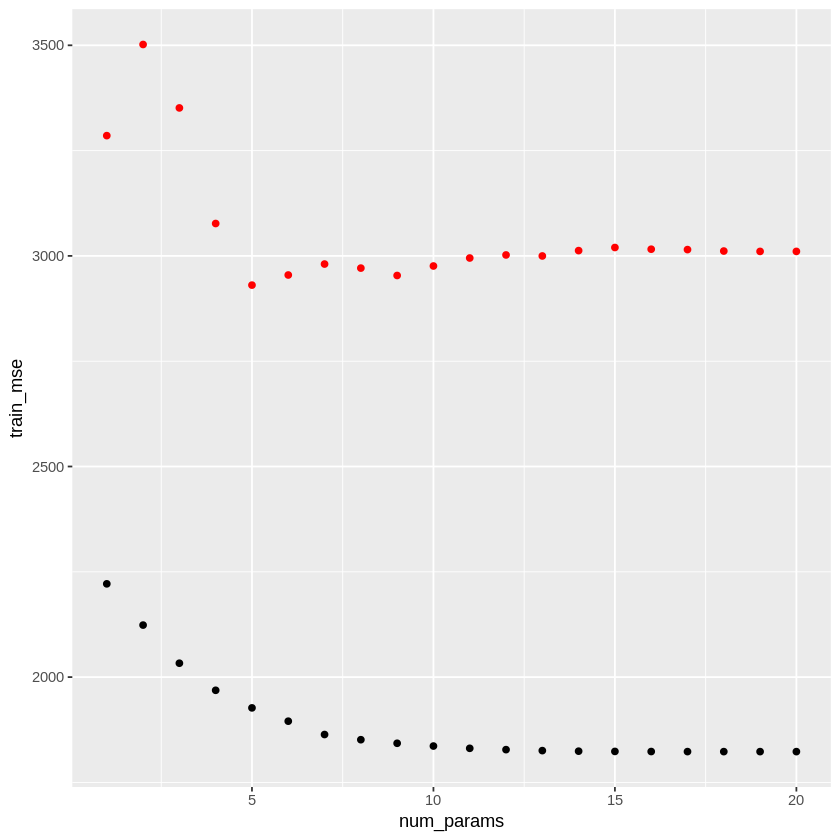

In [35]:
# WRITE YOUR CODE HERE
regfit.full = regsubsets(y~., d2_train, nvmax=20)
reg.summary = summary(regfit.full)
reg.summary

train_mse = matrix(data=NA,nrow=length(p_size),ncol=1)
test_mse = matrix(data=NA,nrow=length(p_size),ncol=1)
count = 1

for (num_ps in 1:20){
  betas<-coef(regfit.full, num_ps)
  #print(betas)
  #get included variables
  included<-as.numeric(which(reg.summary$outmat[num_ps,]=="*"))

  #get train x data
  x_train<-as.matrix(d2_train[,included+1])

  #calc train MSE
  train_mse[count]<- mean((d2_train$y-c(predict_train_y<-x_train%*%betas[-1]+betas[1]))^2)

  #get test x data
  x_test<-as.matrix(d2_test[,included+1])

  #calc test MSE
  test_mse[count]<- mean((d2_test$y-c(predict_train_y<-x_test%*%betas[-1]+betas[1]))^2)

  count <- count + 1
  print(count)
}


output_mse<-data.frame(num_params=1:20, train_mse=train_mse, test_mse=test_mse)
ggplot(output_mse, aes(num_params, train_mse)) +
  geom_point() +
  geom_point(aes(num_params, test_mse), color = "red")

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [41]:
# WRITE YOUR CODE HERE

cat("The model with the best test MSE is the one with:", which(test_mse==min(test_mse)), "parameters (plus the intercept).")

coef(regfit.full, which(test_mse==min(test_mse)))

print(beta_20)

The model with the best test MSE is the one with: 5 parameters (plus the intercept).

(Intercept)          x1          x3          x6          x8         x11 
 523.647783    7.060483    9.802673    9.970948   11.211905    9.442430

           [,1]
 [1,]  9.457472
 [2,]  6.551035
 [3,] 10.648700
 [4,]  4.616911
 [5,]  7.352204
 [6,] 15.344970
 [7,]  1.681919
 [8,] 13.204474
 [9,]  0.000000
[10,]  0.000000
[11,]  0.000000
[12,]  0.000000
[13,]  0.000000
[14,]  0.000000
[15,]  0.000000
[16,]  0.000000
[17,]  0.000000
[18,]  0.000000
[19,]  0.000000
[20,]  0.000000


> *Write your response here*
> The model with the best test MSE is:

(Intercept): 523.647782935155

x1: 7.06048329784551

x3: 9.80267299461187

x6: 9.97094806169357

x8: 11.2119046298208

x11: 9.4424303519291

It gets pretty close to the actual model used to simulate the dataset in that it includes mostly only variables from x1-x8 (which the the only non-zero variables). It correctly includes 4/8 of those variables, and the parameter estimates are (pretty) close to the original values. Although I didn't use an intercept to simulate the data, but the intercept parameter estimate is quite large, and x11 was also included. Also x11 got included even though its true value is 0.

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*